In [1]:
import pandas as pd
import os
import numpy as np

In [51]:
os.getcwd()

'/Users/qinwayne.toh/Desktop'

In [3]:
os.chdir('/Users/qinwayne.toh/Desktop')

## Read Excel sheet from Homework

In [4]:
df = pd.read_excel('lending_club_loans.xlsx', engine="openpyxl", header=1)


In [5]:
df_description = pd.read_excel('lending_club_loans.xlsx', engine="openpyxl", header=0, sheet_name='data_dictionary')
df_description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [6]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,70686,70681.0,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 115, dtype: int64

## Finding percentage null for different columns and dropping useless columns

In [8]:
def percentage_null(df):
    total_number_of_rows = len(df)
    return ((df.isna().sum())/total_number_of_rows)

In [9]:
df_null_percentage = percentage_null(df)

In [10]:
(df_null_percentage == 1.0).sum()

54

In [11]:
useless_col = []
for key, val in df_null_percentage.items():
    if val == 1:
        useless_col.append(key)
useless_col

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [12]:
len(useless_col)

54

In [13]:
df_useful = df.drop(useless_col, axis=1)

In [14]:
df_useful

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,70686,70681.0,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,...,794.0,790.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking whether the remaining columns have a high NULL proportion

In [15]:
percentage_null(df_useful)

id                          0.000094
member_id                   0.000165
loan_amnt                   0.000165
funded_amnt                 0.000165
funded_amnt_inv             0.000165
                              ...   
acc_now_delinq              0.000846
chargeoff_within_12_mths    0.003573
delinq_amnt                 0.000846
pub_rec_bankruptcies        0.032250
tax_liens                   0.002633
Length: 61, dtype: float64

In [18]:
for key, val in percentage_null(df_useful).items():
    if val >=0.1:
        print(key)

desc
mths_since_last_delinq
mths_since_last_record
next_pymnt_d


In [16]:
percentage_null(df_useful)['mths_since_last_record']

0.9141789290583423

In [17]:
percentage_null(df_useful)['next_pymnt_d']

0.9225236237130365

In [21]:
percentage_null(df_useful)['desc']

0.3126322222744582

In [22]:
percentage_null(df_useful)['mths_since_last_delinq']

0.6330920031968408

## Removing rows that have zero information/ columns that have only 1 unique value

In [23]:
singular_val_col = []
for col in df_useful.columns:
    if len(df_useful[col].value_counts()) == 1:
        singular_val_col.append(col)
singular_val_col

['initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths']

In [24]:
df_useful.collections_12_mths_ex_med.value_counts()

0.0    42390
Name: collections_12_mths_ex_med, dtype: int64

In [25]:
df_useful.application_type.value_counts()

INDIVIDUAL    42535
Name: application_type, dtype: int64

In [26]:
df_useful.policy_code.value_counts()

1.0    42535
Name: policy_code, dtype: int64

In [27]:
df_useful.initial_list_status.value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [28]:
df_useful.chargeoff_within_12_mths.value_counts()

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

In [29]:
df_useful_drop_singular = df_useful.drop(singular_val_col, axis=1)

In [30]:
zero_val_row_index = []
count_dict = df_useful_drop_singular.count(axis=1)

for i in range(0, len(df_useful_drop_singular)):
    if count_dict[i] == 0:
        zero_val_row_index.append(i)
        


In [31]:
df_useful_drop_singular.iloc[zero_val_row_index]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
39786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
39787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_useful_dropped = df_useful_drop_singular.drop(zero_val_row_index)


### Drop last 2 rows that contain no useful information as well

In [33]:
df_useful_dropped = df_useful_dropped.drop([42540, 42541])

In [34]:
df_useful_dropped = df_useful_dropped.reset_index().drop('index', axis=1)

In [35]:
df_useful_dropped

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,2015-01-01,171.62,NaT,2016-09-01,744.0,740.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,2013-04-01,119.66,NaT,2016-09-01,499.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,2014-06-01,649.91,NaT,2016-09-01,719.0,715.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,2015-01-01,357.48,NaT,2016-04-01,604.0,600.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,2016-09-01,67.79,2016-10-01,2016-09-01,694.0,690.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,0.1028,113.39,C,C1,...,2008-03-01,0.00,2008-03-01,2013-02-01,819.0,815.0,NaN,NaN,NaN,NaN
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,0.0964,32.11,B,B4,...,2010-06-01,32.41,2010-07-01,2014-09-01,784.0,780.0,NaN,NaN,NaN,NaN
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,0.0933,80.69,B,B3,...,2010-06-01,82.03,2010-07-01,2007-05-01,714.0,710.0,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,0.0838,204.84,A,A5,...,2010-06-01,205.32,2010-07-01,2007-08-01,724.0,720.0,NaN,NaN,NaN,NaN


In [36]:
percentage_null(df_useful_dropped)

id                         0.000000
member_id                  0.000024
loan_amnt                  0.000024
funded_amnt                0.000024
funded_amnt_inv            0.000024
term                       0.000024
int_rate                   0.000024
installment                0.000024
grade                      0.000024
sub_grade                  0.000024
emp_title                  0.061759
emp_length                 0.026166
home_ownership             0.000024
annual_inc                 0.000118
verification_status        0.000024
issue_d                    0.000024
loan_status                0.000024
pymnt_plan                 0.000024
url                        0.000024
desc                       0.312535
purpose                    0.000024
title                      0.000353
zip_code                   0.000024
addr_state                 0.000024
dti                        0.000024
delinq_2yrs                0.000705
earliest_cr_line           0.000705
fico_range_low             0

## Df with useful columns

### Following are the useful columns that the team has decided to utilize for our EDA analysis

In [37]:
df_final = df_useful_dropped[['id', 'issue_d', 'acc_now_delinq', 'annual_inc', 'delinq_2yrs', 'delinq_amnt', 'emp_length', 
                              'funded_amnt', 'int_rate', 'loan_status', 'loan_amnt', 'grade']]

### Look at a quick summary of the columns we have that are of integer type

In [38]:
df_final.describe()

,acc_now_delinq,annual_inc,delinq_2yrs,delinq_amnt,funded_amnt,int_rate,loan_amnt
count,42506.000000,4.253100e+04,42506.000000,42506.000000,42535.000000,42535.000000,42535.000000
mean,0.000094,6.913656e+04,0.152449,0.143039,10821.585753,0.121650,11089.722581
std,0.009700,6.409635e+04,0.512406,29.359579,7146.914675,0.037079,7410.938391
min,0.000000,1.896000e+03,0.000000,0.000000,500.000000,0.054200,500.000000
25%,0.000000,4.000000e+04,0.000000,0.000000,5000.000000,0.096300,5200.000000
50%,0.000000,5.900000e+04,0.000000,0.000000,9600.000000,0.119900,9700.000000
75%,0.000000,8.250000e+04,0.000000,0.000000,15000.000000,0.147200,15000.000000
max,1.000000,6.000000e+06,13.000000,6053.000000,35000.000000,0.245900,35000.000000


In [39]:
df_final

,id,issue_d,acc_now_delinq,annual_inc,delinq_2yrs,delinq_amnt,emp_length,funded_amnt,int_rate,loan_status,loan_amnt,grade
0,1077501,2011-12-01,0.0,24000.0,0.0,0.0,10+ years,5000.0,0.1065,Fully Paid,5000.0,B
1,1077430,2011-12-01,0.0,30000.0,0.0,0.0,< 1 year,2500.0,0.1527,Charged Off,2500.0,C
2,1077175,2011-12-01,0.0,12252.0,0.0,0.0,10+ years,2400.0,0.1596,Fully Paid,2400.0,C
3,1076863,2011-12-01,0.0,49200.0,0.0,0.0,10+ years,10000.0,0.1349,Fully Paid,10000.0,C
4,1075358,2011-12-01,0.0,80000.0,0.0,0.0,1 year,3000.0,0.1269,Current,3000.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,2007-06-01,NaN,180000.0,NaN,NaN,< 1 year,3500.0,0.1028,Does not meet the credit policy. Status:Fully ...,3500.0,C
42532,72998,2007-06-01,NaN,12000.0,NaN,NaN,< 1 year,1000.0,0.0964,Does not meet the credit policy. Status:Fully ...,1000.0,B
42533,72176,2007-06-01,NaN,110000.0,NaN,NaN,< 1 year,2525.0,0.0933,Does not meet the credit policy. Status:Fully ...,2525.0,B
42534,71623,2007-06-01,NaN,NaN,NaN,NaN,< 1 year,6500.0,0.0838,Does not meet the credit policy. Status:Fully ...,6500.0,A


## Do EDA on data

In [40]:
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [41]:
df_final.columns

Index(['id', 'issue_d', 'acc_now_delinq', 'annual_inc', 'delinq_2yrs',
       'delinq_amnt', 'emp_length', 'funded_amnt', 'int_rate', 'loan_status',
       'loan_amnt', 'grade'],
      dtype='object')

### Do plotting of distribution of credit grade via piechart

In [42]:
df_final.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [43]:
grade_distr = df_final[['grade', 'id']].groupby('grade').count()

In [44]:
grade_distr = grade_distr.rename({'id': 'Count'}, axis=1)
grade_distr = grade_distr.reset_index()

In [45]:
grade_distr

,grade,Count
0,A,10183
1,B,12389
2,C,8740
3,D,6016
4,E,3394
5,F,1301
6,G,512


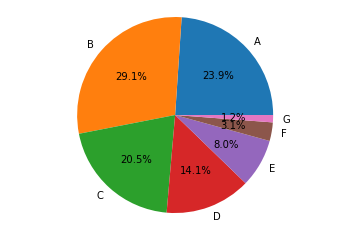

In [46]:
fig, ax = plt.subplots()
ax.pie(grade_distr.Count, labels=grade_distr.grade, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

## Plot how loan_amnt changes with time using median and mean.

<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

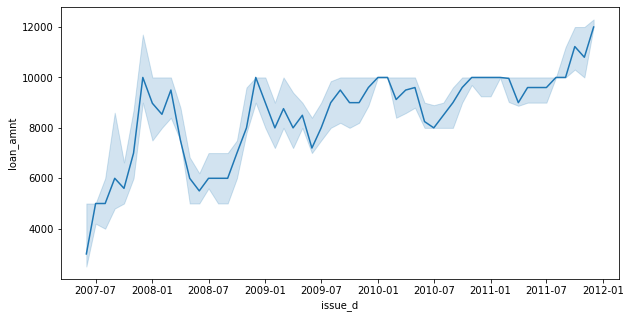

In [47]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_final.issue_d, y = df_final.loan_amnt, estimator=np.median)

<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

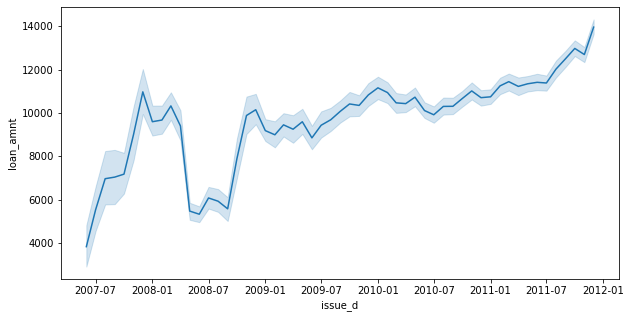

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_final.issue_d, y = df_final.loan_amnt, estimator=np.mean)

## Do boxplot

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

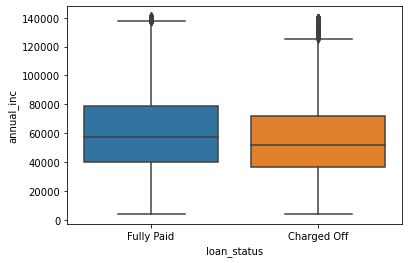

In [49]:
df_final.groupby('loan_status')['loan_status'].count()
df_tmp = df_final[(df_final['loan_status'] == 'Fully Paid') | (df_final['loan_status'] == 'Charged Off')]
df_tmp = df_tmp[df_tmp['annual_inc'].astype(float) < df_tmp['annual_inc'].quantile(0.95)]
sns.boxplot(x=df_tmp['loan_status'], y=df_tmp['annual_inc'])


<AxesSubplot:xlabel='loan_amnt', ylabel='emp_length'>

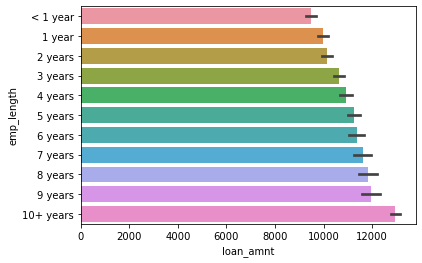

In [50]:
sns.barplot(x=df_final['loan_amnt'], y=df_final['emp_length'], order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                                                                        '6 years', '7 years', '8 years', '9 years', '10+ years'])